# Natural Language Processing

These examples will be using the Wizard of Oz books gathered from Project Gutenberg. 

In [1]:
import string
from collections import Counter
import spacy
import textacy  
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load('en')
%matplotlib inline

## Processing

* Reading in the document

* Splitting by header and footer 

* Parsing individual stories, saving into lists to access later

In [2]:
# Read document
with open('../data/pg25519.txt', 'r') as f:
    read_file = f.read()
    
# Remove gutenberg header/footer
# After the start text there is a block of new line characters we can split by.
file_start = read_file.split('\n\n\n\n\n\n\n\n')[-1]  
# The end is notated similar to the start.
file_full = file_start.split('***END OF THE PROJECT GUTENBERG EBOOK LITTLE WIZARD STORIES OF OZ***')[0]
file_full = file_full.replace('[Illustration]', '').replace('\n', ' ') # Replace unnecessary words or chars

# Parsing the individual stories
the_cowardly_lion_and_the_hungry_tiger = file_full.split('THE COWARDLY LION AND THE HUNGRY TIGER')[1]\
.split('LITTLE DOROTHY AND TOTO')[0]

little_dorothy_and_toto = file_full.split('LITTLE DOROTHY AND TOTO')[1]\
.split('TIKTOK AND THE NOME KING')[0]

ticktok_and_the_nome_king = file_full.split('TIKTOK AND THE NOME KING')[1]\
.split('OZMA AND THE LITTLE WIZARD')[0]

ozma_and_the_little_wizard = file_full.split('OZMA AND THE LITTLE WIZARD')[1]\
.split('JACK PUMPKINHEAD AND THE SAWHORSE')[0]

jack_pumpkinhead_and_the_sawhorse = file_full.split('JACK PUMPKINHEAD AND THE SAWHORSE')[1]\
.split('THE SCARECROW AND THE TIN WOODMAN')[0]

the_scarecrow_and_the_tin_woodman = file_full.split('THE SCARECROW AND THE TIN WOODMAN')[1]\
.split('But the Tin Woodmanwas very careful not to stand up in the boat again.')[0] + \
                                        ' But the Tin Woodman was very careful not to stand up in the boat again.'
    
# Create list of documents for corpus 
documents = [the_cowardly_lion_and_the_hungry_tiger, little_dorothy_and_toto, ticktok_and_the_nome_king,\
            ozma_and_the_little_wizard, jack_pumpkinhead_and_the_sawhorse, the_scarecrow_and_the_tin_woodman]
document_names = ['the_cowardly_lion_and_the_hungry_tiger', 'little_dorothy_and_toto', 'ticktok_and_the_nome_king',\
            'ozma_and_the_little_wizard', 'jack_pumpkinhead_and_the_sawhorse', 'the_scarecrow_and_the_tin_woodman']

## Cleaning
* Removing Stopwords

* Make Lowercase

In [3]:
def cleaning_and_preprocessing(doc):
    """ Function to clean and run the text pre-processing steps.
    1. Lowercase
    2. Punctuation
    3. Stopwords
    4. Stemming
    :param doc: string
    :returns: spacy doc object
    """
    # Lowercase -- can be done in spacy doc object as doc.lower_
    doc = doc.lower()
    
    # Punctuation
    doc = textacy.preprocess.remove_punct(doc)
    
    # Stemming/lemmatization
    doc = [w.lemma_ for w in nlp(doc)]
    
    # Stopwords (using spacy stopwords)
    doc = [w for w in doc if not w in spacy.en.STOP_WORDS]
    
    # Custom stopwords to remove
    rm = ['-PRON-', ' ', '      ', '   ', '   ', '   ']
    doc = [w for w in doc if not w in rm]
    
    # Additional normalization using textacy
    doc = [textacy.preprocess_text(w) for w in doc]
    
    return doc

## Parts of Speech

Bonus: What are the most frequent used nouns and verbs

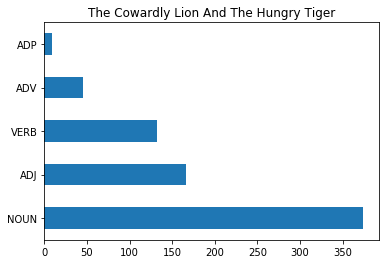

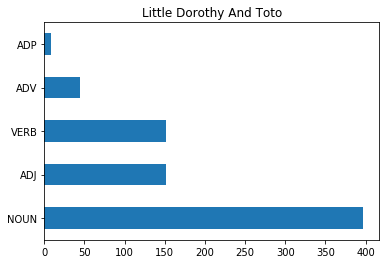

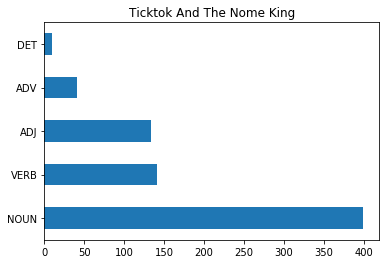

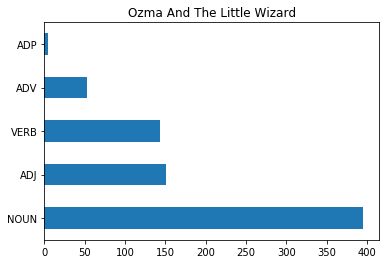

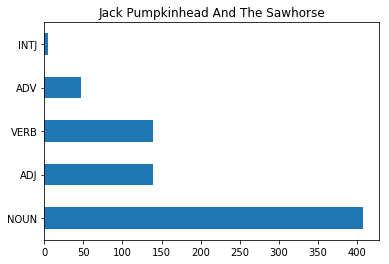

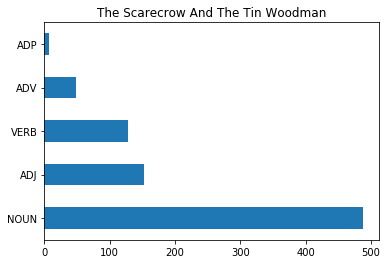

In [4]:
# Documents 
def identify_pos(doc):
    """Function to identify the pos of the given text
    Cleans document, loads into spacy document, gathers pos tags and returns 
    in a format to easily analyze.
    :param doc: document
    :returns: Series 
    """
    cleaned_doc = cleaning_and_preprocessing(doc)  # cleaning 
    cleaned_doc = nlp(' '.join(cleaned_doc))  # spacy doc 
    return pd.Series([token.pos_ for token in cleaned_doc])  # list comp for pd series


for idx, doc in enumerate(documents):
    clean_doc = identify_pos(doc)
    clean_name = string.capwords(document_names[idx].replace('_', ' '))
    clean_doc.value_counts()[:5].plot(kind='barh', title=clean_name)
    plt.show()

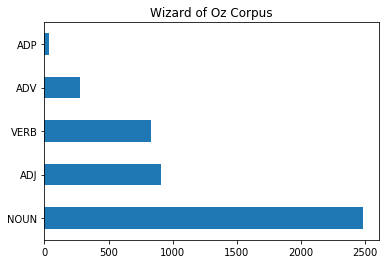

In [5]:
# Corpus
clean_corpus = identify_pos(file_full)
clean_corpus.value_counts()[:5].plot(kind='barh', title='Wizard of Oz Corpus')

#### Bonus: What are some of the most frequently-used nouns and verbs?

In [9]:
# Most frequent nouns (person, place or thing)
nouns = [token.text for token in nlp(' '.join(cleaning_and_preprocessing(file_full))) if token.pos_ == 'NOUN']
print('Frequent nouns for the corpus: \n')
print(pd.Series(nouns).value_counts()[:10])

print('\n\nFrequent verbs for the corpus: \n')
# Most frequent verb (action, occurance or state)
verbs = [token.text for token in nlp(' '.join(cleaning_and_preprocessing(file_full))) if token.pos_ == 'VERB']
print(pd.Series(verbs).value_counts()[:10])

Frequent nouns for the corpus: 

wizard       49
man          44
head         40
king         38
lion         31
tiger        30
tin          30
jack         28
scarecrow    26
girl         25
dtype: int64


Frequent verbs for the corpus: 

find     26
come     24
ask      20
think    17
know     16
sit      13
eat      12
look     12
run      12
try      12
dtype: int64


## N-Grams 
Count 2-grams, 3-grams, and 4-grams instead of words. Plot the Zipfian distribution and the Heaps distribution (Heaps not required if using Python). What are the top 20 phrases for each type of n-gram?

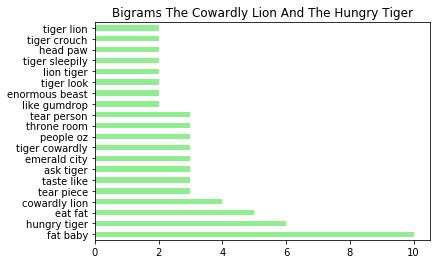

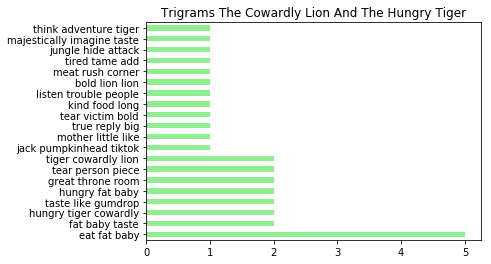

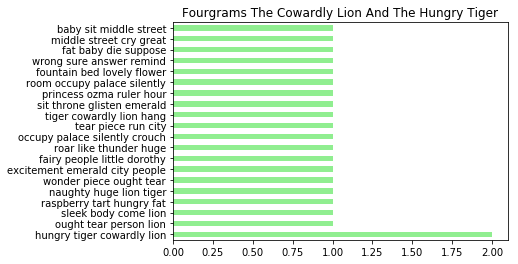

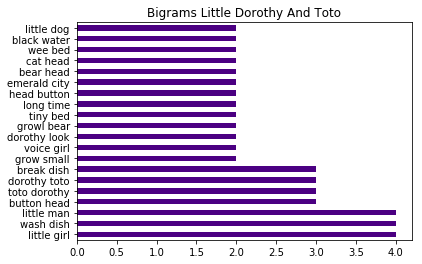

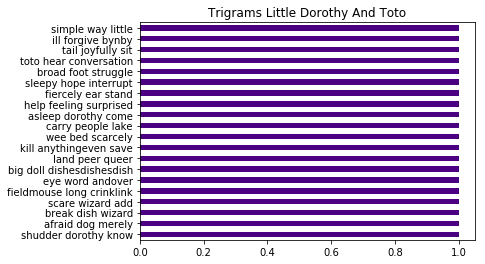

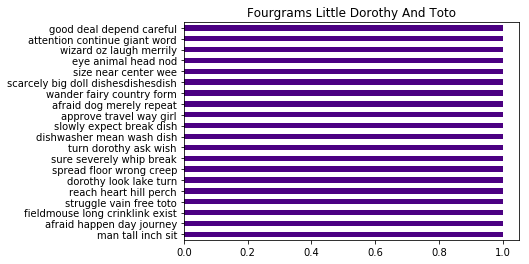

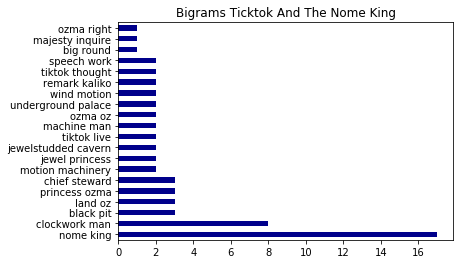

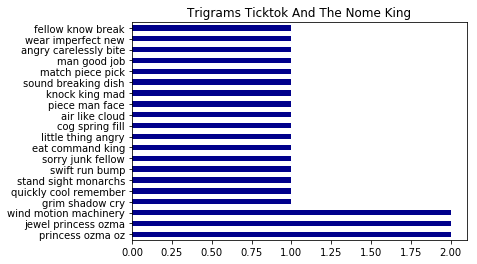

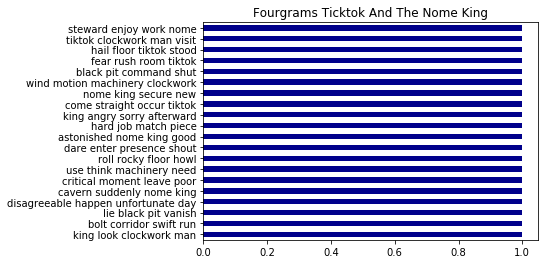

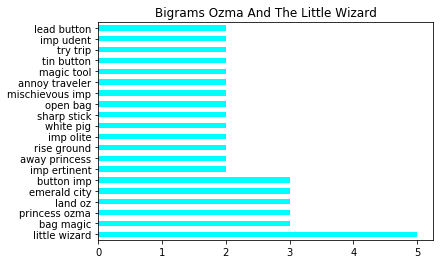

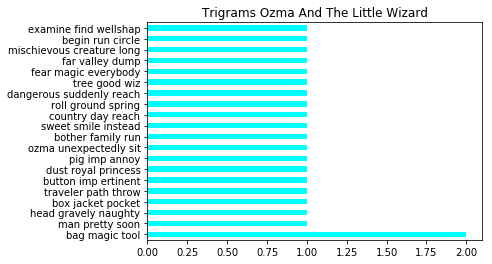

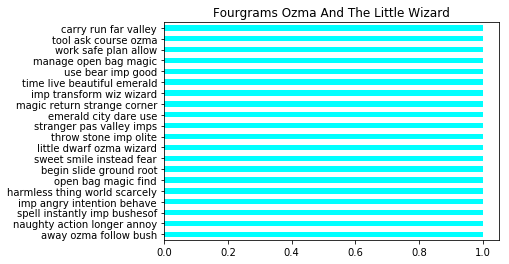

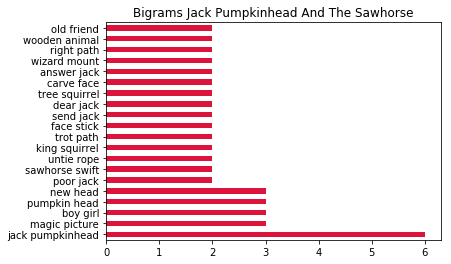

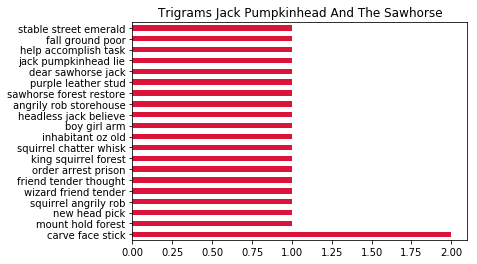

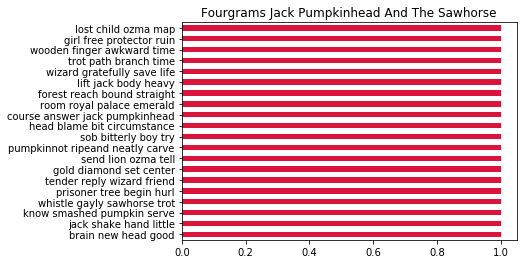

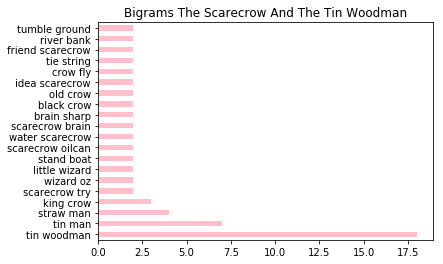

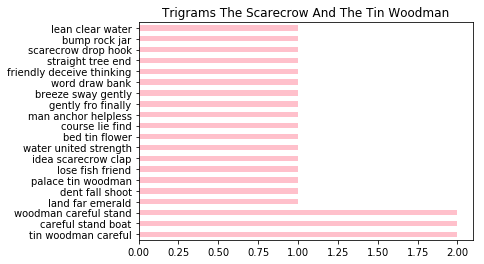

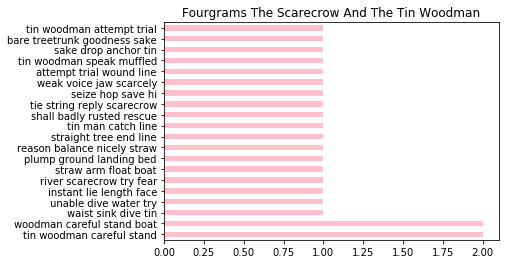

In [12]:
# Documents 
def identify_ngrams(doc):
    """Function to identify the pos of the given text
    Cleans document, loads into spacy document, gathers pos tags and returns 
    in a format to easily analyze.
    :param doc: document
    :returns: Series 
    """
    cleaned_doc = cleaning_and_preprocessing(doc)  # cleaning 
    cleaned_doc = nlp(' '.join(cleaned_doc))  # spacy doc 
    
    # bigrams
    bigrams = list(textacy.extract.ngrams(cleaned_doc, 2))
    bigrams = pd.Series([str(i) for i in bigrams])
    
    # trigrams
    trigrams = list(textacy.extract.ngrams(cleaned_doc, 3))
    trigrams = pd.Series([str(i) for i in trigrams])
    
    # 4grams (unsure of vernacular???)
    fourgrams = list(textacy.extract.ngrams(cleaned_doc, 4))
    fourgrams = pd.Series([str(i) for i in fourgrams])
    
    return bigrams, trigrams, fourgrams

colors = ['lightgreen', 'indigo', 'darkblue', 'cyan', 'crimson', 'pink']
for idx, doc in enumerate(documents):
    bigrams, trigrams, fourgrams = identify_ngrams(doc)
    clean_name = string.capwords(document_names[idx].replace('_', ' '))
    
    # Process each 
    bigrams.value_counts()[:20].plot(kind='barh', color=colors[idx], title='Bigrams ' + clean_name)
    plt.show()
    trigrams.value_counts()[:20].plot(kind='barh', color=colors[idx], title='Trigrams ' + clean_name)
    plt.show()
    fourgrams.value_counts()[:20].plot(kind='barh', color=colors[idx], title='Fourgrams ' + clean_name)
    plt.show()

### Corpus Zipf Plot

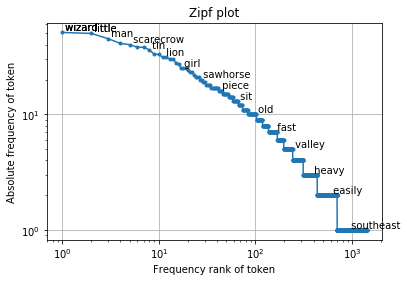

In [13]:
from pylab import *

# Pick a lowercasing function according to Python version
lower = str.lower

# The data: token counts from the Brown corpus
tokens_with_count = Counter(map(lower, cleaning_and_preprocessing(file_full)))
#Dictionary keys in Python 3 aren't indexable, so store the tokens as a list.
#The list is sorted to prevent changes in display text on repeated runs.
tokens = sorted([k for k in tokens_with_count.keys()])
counts = array([tokens_with_count[k] for k in tokens])

# A Zipf plot
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
loglog(ranks, frequencies, marker=".")
title("Zipf plot")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)):
    try:
        dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                     verticalalignment="bottom",
                     horizontalalignment="left")
    except:
        pass
show()

## Create word clouds of the n-grams.



Bigrams



(-0.5, 399.5, 199.5, -0.5)

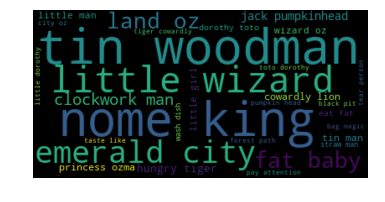

In [14]:
def ngrams_wordcloud_plott(df):
    # wordcloud object
    wc = WordCloud(prefer_horizontal=1.0)

    # words and plot sizes (word count, relevance, etc)
    wc.generate_from_frequencies(df.to_dict()[df.columns[0]])

    # plot wordcloud
    plt.figure(dpi=600, figsize=(6,4))
    plt.imshow(wc)
    plt.axis("off")
    pass

bigrams, trigrams, fourgrams = identify_ngrams(file_full)
clean_name = 'Wizard of Oz Corpus'

# prep for wc
bigrams_30 = pd.DataFrame(bigrams.value_counts()[:30])
trigrams_30 = pd.DataFrame(trigrams.value_counts()[:30])
fourgrams = pd.DataFrame(fourgrams.value_counts()[:20])


# Process
print('Bigrams\n')
wordcloud = WordCloud().generate_from_frequencies(bigrams_30.to_dict()[bigrams_30.columns[0]])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


Trigrams



(-0.5, 399.5, 199.5, -0.5)

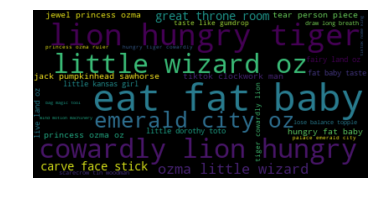

In [15]:
print('\nTrigrams\n')
wordcloud = WordCloud().generate_from_frequencies(trigrams_30.to_dict()[trigrams_30.columns[0]])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


Fourgrams



(-0.5, 399.5, 199.5, -0.5)

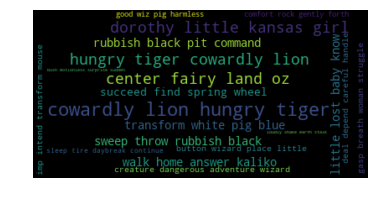

In [16]:
print('\nFourgrams\n')
wordcloud = WordCloud().generate_from_frequencies(fourgrams.to_dict()[fourgrams.columns[0]])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Choose some n-grams, and find the top most similar n-grams of the same length.



In [17]:
bigram_lion = nlp('cowardly lion')

coward_lion_similar = pd.DataFrame([(bigram_lion.similarity(nlp(i)), i) for i in bigrams])
coward_lion_similar.columns = ['similarity', 'bigram']  # rename columns

coward_lion_similar = coward_lion_similar.drop_duplicates()  # rm duplicate bigrams
coward_lion_similar.sort(['similarity'], ascending=False)[:20]

/Users/brandon/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,similarity,bigram
479,1.000000,lion growl
695,1.000000,lion grunt
577,1.000000,lion indignantly
3,1.000000,cowardly lion
353,1.000000,nutmeg lion
607,1.000000,lion dignity
140,1.000000,lion yawn
3673,1.000000,lion ozma
385,1.000000,inquire lion
167,1.000000,lion sway


In [18]:
trigram_emerald = nlp('emerald city oz')

emerald_similar = pd.DataFrame([(trigram_emerald.similarity(nlp(i)), i) for i in trigrams])
emerald_similar.columns = ['similarity', 'trigram']  # rename columns

emerald_similar = emerald_similar.drop_duplicates()  # rm duplicate bigrams
emerald_similar.sort(['similarity'], ascending=False)[:20]

/Users/brandon/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,similarity,trigram
776,1.000000,emerald city oz
777,1.000000,city oz wander
3833,0.909660,city oz pretty
3004,0.904934,city oz hang
3038,0.832453,west oz hopelessly
778,0.812852,oz wander country
3745,0.802894,land oz queerly
112,0.802793,people oz seldom
3037,0.800847,far west oz
26,0.787513,oz great throne


## Resources

(Zipf Plot - Python 3) https://gist.github.com/ajnelson-nist/f93e07fca60d0fb42c5c

(Zipf Plot) https://gist.github.com/fnielsen/7102991

https://spacy.io

http://textacy.readthedocs.io/en/latest/index.html

http://scikit-learn.org/stable/

http://matplotlib.org

http://pandas.pydata.org

https://github.com/amueller/word_cloud/

https://nicschrading.com/project/Intro-to-NLP-with-spaCy/